In [1]:
import numpy as np

In [10]:
60. + 40 * np.tanh(10000/6268)

96.8389592410982

In [6]:
## General librairies
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import sys
import time
from copy import deepcopy


## Cosine Distance
from scipy.spatial.distance import cosine

import tensorflow as tf

## Keras utilities
import tensorflow.keras
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.utils as np_utils
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Conv2D, Lambda,  Dense, Flatten,MaxPooling2D,Dropout, UpSampling2D
# from tensorflow.keras.engine.input_layer import Input
# from tensorflow.keras.layers import merge
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.regularizers import l2
import numpy.random as rng
from sklearn.utils import shuffle

## Sklearn utilities
#### Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#### Scores
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#### Feature transformations
import umap

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input,Concatenate, Conv2D, Lambda,Flatten, Activation, Dense, BatchNormalization, MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.activations import softmax


## Removing some of the useless warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# Some useful functions to ease the processings
def save(file,name, folder = ""):
    if folder != "":
        outfile = open('./'+folder+'/'+name+'.pickle', 'wb')
    else:
        outfile = open(name+'.pickle', 'wb')
    pickle.dump(file, outfile)
    outfile.close
    
def load(name, folder = ""):
    if folder != "":
        outfile = open('./'+folder+'/'+name+'.pickle', 'rb')
    else:
        outfile = open(name+'.pickle', 'rb')
    file = pickle.load(outfile)
    outfile.close
    return file

def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    x = list(range(len(acc)))
    plt.plot(x,acc)
    plt.plot(x,val_acc)
    
def cat_to_num(y):
    y1 = []
    for i in range(y.shape[0]):
        a = 0
        for j in range(y.shape[1]):
            a += j*y[i,j]
        y1.append(int(a))
    return y1

def generate_integer():
    
    ints = []
    
    while len(ints)<5:
        r = random.randint(0,63)
        if not(r in ints):
            ints.append(r)
    return ints

<Figure size 432x288 with 0 Axes>

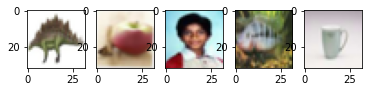

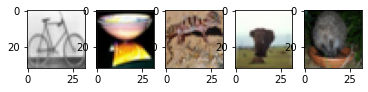

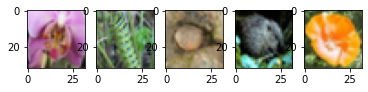

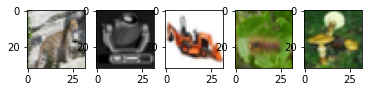

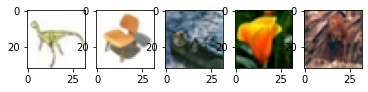

In [8]:
OT = load('training_set')

for i in range(5):
    plt.figure(i)
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
    ax1.imshow(OT['data'][600*i+1])
    ax2.imshow(OT['data'][600*i+2])    
    ax3.imshow(OT['data'][600*i+3])
    ax4.imshow(OT['data'][600*i+4])
    ax5.imshow(OT['data'][600*i+5])
    
Y_meta = OT['label']
X_meta = OT['data']

y_meta = np_utils.to_categorical(Y_meta)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_meta, y_meta, test_size=0.2, random_state=42)

In [10]:
X_meta.shape

(38400, 32, 32, 3)

In [11]:
import resnet
build = resnet.ResnetBuilder()
model = build.build_resnet_12((32,32,3),64)

ModuleNotFoundError: No module named 'resnet'

In [ ]:
model.summary()

In [18]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

# model.summary()



# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# save(history, '2.resnet2 with augmentation', 'results')
# save(model, '2.resnet2 with augmentation', 'model')
# plot(history)

In [ ]:
optimizer = SGD(0.1)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=6, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)
reduce = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, 
                                                     mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.001)

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=6, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)
reduce = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, 
                                                     mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.001)

import time
batch_size = 128
epochs = 30
t0 = time.time()
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs, callbacks = [stop, reduce])

t1 = time.time()
print(t1-t0)

In [ ]:
save(model, 'resnet12', 'model')

In [ ]:
dir(model)

In [ ]:
model.save_weights('resnet12_big.h5')

best score : train 0.7184 test 0.6374

## Distillation

#### Baseline distilled model

In [12]:
## distilled model


inputs = Input(shape = (32,32,3))

x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
dense = Dense(64)(x)

outputs = softmax(dense, axis = -1)

distilled_base = Model(inputs, outputs)

In [13]:
## distilled model


inputs = Input(shape = (32,32,3))

### Block 1
x = block(inputs, 12)

### Block 2
x = block(x, 12)

### Block 3
x = block(x, 12)

# ### Block 4
# x = block(x, 12)

x = Flatten()(x)

dense = Dense(64)(x)

outputs = softmax(dense, axis = -1)

distilled_base = Model(inputs, outputs)

NameError: name 'block' is not defined

In [14]:
distilled_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0     

In [15]:
optimizer = SGD(0.1)

distilled_base.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=8, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)
reduce = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, 
                                                     mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

import time
batch_size = 1024
epochs = 40
t0 = time.time()
history = distilled_base.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs, callbacks = [stop, reduce])

t1 = time.time()
print(t1-t0)

Epoch 1/40
30/30 [==============================] - 10s 321ms/step - loss: 3.1195 - accuracy: 0.2133 - val_loss: 2.9978 - val_accuracy: 0.2440
Epoch 2/40
30/30 [==============================] - 10s 318ms/step - loss: 3.0558 - accuracy: 0.2265 - val_loss: 2.9658 - val_accuracy: 0.2514
Epoch 3/40
30/30 [==============================] - 9s 317ms/step - loss: 3.0144 - accuracy: 0.2353 - val_loss: 2.9656 - val_accuracy: 0.2466
Epoch 4/40
30/30 [==============================] - 10s 317ms/step - loss: 2.9717 - accuracy: 0.2423 - val_loss: 2.8877 - val_accuracy: 0.2598
Epoch 5/40
30/30 [==============================] - 9s 317ms/step - loss: 2.9336 - accuracy: 0.2463 - val_loss: 2.8456 - val_accuracy: 0.2682
Epoch 6/40
30/30 [==============================] - 9s 315ms/step - loss: 2.8962 - accuracy: 0.2557 - val_loss: 2.7512 - val_accuracy: 0.2964
Epoch 7/40
30/30 [==============================] - 9s 317ms/step - loss: 2.8575 - accuracy: 0.2662 - val_loss: 2.7547 - val_accuracy: 0.2930
Epo

best_score : train : 0.2936 test : 0.2823

## Distillation

In [ ]:
import resnet
build = resnet.ResnetBuilder()
model_big = build.build_resnet_12((32,32,3),64)
model_big.load_weights('resnet12_big.h5')

inputs = model_big.input
outputs = model_big.layers[-2].output

teacher = Model(inputs, outputs)

In [ ]:
train_logit = teacher.predict(X_train)
test_logit = teacher.predict(X_test)

In [ ]:
y_traind = np.concatenate([y_train, train_logit], axis = 1)
y_testd = np.concatenate([y_test, test_logit], axis = 1)

In [ ]:
temperature =  5

In [ ]:
def block(x, nn):
    
    x = Conv2D(filters=nn, kernel_size=(3, 3), strides=1, padding="same", kernel_initializer="he_normal", 
           kernel_regularizer=l2(1e-4), activation = 'relu')(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(filters=nn, kernel_size=(3, 3), strides=1, padding="same", kernel_initializer="he_normal", 
           kernel_regularizer=l2(1e-4), activation = 'relu')(x)
    x = BatchNormalization()(x)
    
#     x = Conv2D(filters=nn, kernel_size=(3, 3), strides=1, padding="same", kernel_initializer="he_normal", 
#            kernel_regularizer=l2(1e-4))(x)
#     x = BatchNormalization()(x)
    
    x = MaxPooling2D()(x)
    return x

In [ ]:
inputs = Input(shape = (32,32,3))

x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# x = Dense(256, activation='relu')(x)
logits = Dense(64)(x)

# x = Dense(64, activation = 'relu')(x)
# logits = Dense(64)(x)
# logits = model.layers[-1].output
probabilities = Activation('softmax')(logits)
# softed probabilities
logits_T = Lambda(lambda x: x/temperature)(logits)
probabilities_T = Activation('softmax')(logits_T)

output = Concatenate()([probabilities, probabilities_T])
distilled = Model(inputs, output)

# outputs = softmax(dense, axis = -1)

# distilled_base = Model(inputs, outputs)

In [ ]:
inputs = Input(shape = (32,32,3))




### Block 1
x = block(inputs, 12)

### Block 2
x = block(x, 12)

### Block 3
x = block(x, 12)

# ### Block 4
# x = block(x, 12)


x = Flatten()(x)

x = Dense(64, activation = 'relu')(x)
logits = Dense(64)(x)
# logits = model.layers[-1].output
probabilities = Activation('softmax')(logits)
# softed probabilities
logits_T = Lambda(lambda x: x/temperature)(logits)
probabilities_T = Activation('softmax')(logits_T)

output = Concatenate()([probabilities, probabilities_T])
distilled = Model(inputs, output)

# outputs = softmax(dense, axis = -1)

# distilled_base = Model(inputs, outputs)

In [ ]:
distilled.summary()

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy as logloss
from tensorflow.keras.metrics import categorical_accuracy
def knowledge_distillation_loss(y_true, y_pred, lambda_const):    
    
    # split in 
    #    onehot hard true targets
    #    logits from xception
    y_true, logits = y_true[:, :64], y_true[:, 64:]
    
    # convert logits to soft targets
    y_soft = K.softmax(logits/temperature)
    
    # split in 
    #    usual output probabilities
    #    probabilities made softer with temperature
    y_pred, y_pred_soft = y_pred[:, :64], y_pred[:, 64:]    
    
    return lambda_const*logloss(y_true, y_pred) + logloss(y_soft, y_pred_soft)

In [ ]:
def accuracy(y_true, y_pred):
    y_true = y_true[:, :64]
    y_pred = y_pred[:, :64]
    return categorical_accuracy(y_true, y_pred)

In [ ]:

lambda_const = 0.8

distilled.compile(
    optimizer=SGD(lr=0.1, momentum=0.9, nesterov=True), 
    loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const), 
    metrics=[accuracy]
)

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=8, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)
reduce = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, 
                                                     mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

import time
batch_size = 64
epochs = 40
t0 = time.time()
history = distilled.fit_generator(aug.flow(X_train, y_traind, batch_size=batch_size),
    validation_data=(X_test, y_testd), steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs, callbacks = [stop, reduce])

t1 = time.time()
print(t1-t0)

In [ ]:
0.3863

In [ ]:
0.4160